In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import PassiveAggressiveRegressor


from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/FTX/FTT-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,1.501756,1.517845,1.460168,1.473047,1.473047,8396595
1,2019-12-01,1.473410,1.480934,1.425907,1.476954,1.476954,9944409
2,2019-12-02,1.476461,1.512531,1.448838,1.492000,1.492000,9514150
3,2019-12-03,1.492000,1.583356,1.492000,1.550795,1.550795,7624523
4,2019-12-04,1.550717,1.819642,1.526406,1.800696,1.800696,11150378
...,...,...,...,...,...,...,...
1092,2022-11-26,1.401195,1.429898,1.349244,1.364939,1.364939,43773375
1093,2022-11-27,1.364506,1.384601,1.315469,1.315469,1.315469,7301184
1094,2022-11-28,1.315751,1.329345,1.281961,1.295093,1.295093,6250102
1095,2022-11-29,1.294036,1.322258,1.278124,1.303769,1.303769,4903379


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

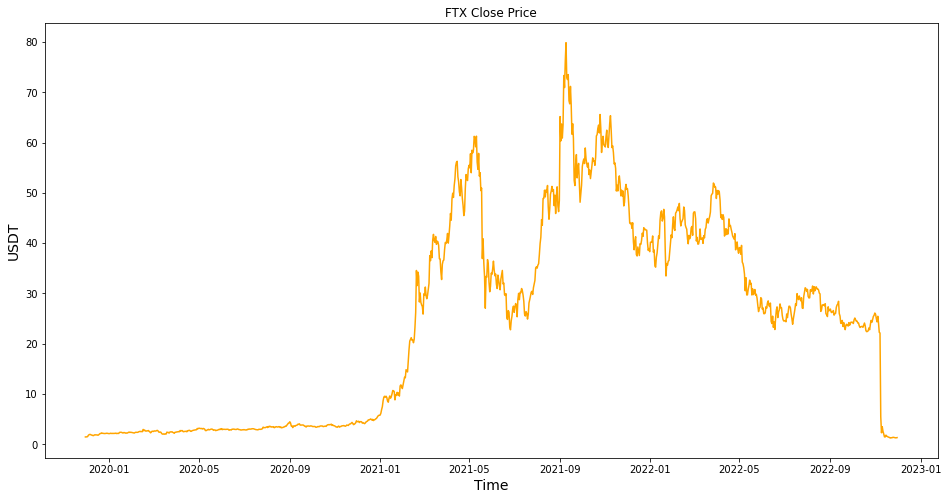

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="orange")
plt.title('FTX Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,1.501756,1.517845,1.460168,1.473047,1.473047,8396595
1,2019-12-01,1.473410,1.480934,1.425907,1.476954,1.476954,9944409
2,2019-12-02,1.476461,1.512531,1.448838,1.492000,1.492000,9514150
3,2019-12-03,1.492000,1.583356,1.492000,1.550795,1.550795,7624523
4,2019-12-04,1.550717,1.819642,1.526406,1.800696,1.800696,11150378
...,...,...,...,...,...,...,...
846,2022-03-25,49.452240,51.429714,49.163292,49.750996,49.750996,238255458
847,2022-03-26,49.749378,50.541172,49.575539,49.919537,49.919537,94919252
848,2022-03-27,49.924557,52.203789,49.644836,51.962048,51.962048,124360636
849,2022-03-28,51.964310,53.192760,51.579144,51.725754,51.725754,159643415


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,51.163799,51.691452,48.706467,48.885368,48.885368,158985625
853,2022-04-01,48.897396,51.130981,47.588886,50.493214,50.493214,161010469
854,2022-04-02,50.490658,51.185368,49.630230,49.728485,49.728485,145408272
855,2022-04-03,49.723057,51.231583,49.434307,50.456226,50.456226,100486929
856,2022-04-04,50.446308,50.446308,48.914635,50.132381,50.132381,119579446
...,...,...,...,...,...,...,...
1092,2022-11-26,1.401195,1.429898,1.349244,1.364939,1.364939,43773375
1093,2022-11-27,1.364506,1.384601,1.315469,1.315469,1.315469,7301184
1094,2022-11-28,1.315751,1.329345,1.281961,1.295093,1.295093,6250102
1095,2022-11-29,1.294036,1.322258,1.278124,1.303769,1.303769,4903379


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,1.501756,1.517845,1.460168,1.473047,8396595
1,1.473410,1.480934,1.425907,1.476954,9944409
2,1.476461,1.512531,1.448838,1.492000,9514150
3,1.492000,1.583356,1.492000,1.550795,7624523
4,1.550717,1.819642,1.526406,1.800696,11150378


In [10]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [11]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


# **Model Selection**

In [14]:
models = [LinearRegression(),
                svm.SVR(),
                RandomForestRegressor(n_estimators=30, n_jobs=-1, max_depth=20),
                DecisionTreeRegressor(),
                KNeighborsRegressor(),
                make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)),
                XGBRegressor(n_estimators=1000),
                PassiveAggressiveRegressor()
               ]

In [15]:
name = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'KNeighborsRegressor', 'SGD Regressor', 'XGBRegressor', 'PassiveAggressiveRegressor']
mse = []
rmse = []
mae = []
r2 = []

for alg in models:
    
    alg.fit(X_train,y_train)
    y_pred=alg.predict(X_test)
    
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(sqrt(mean_absolute_error(y_test, y_pred)))   
    r2.append(r2_score(y_test, y_pred))  
    

results = pd.DataFrame({"Model Name": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2_SCORE": r2})
results

[08:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,MSE,RMSE,MAE,R2_SCORE
0,Linear Regression,0.001511,0.038867,0.167840,0.892545
1,Support Vector Regression,0.017946,0.133961,0.314573,-0.276478
2,Random Forest Regressor,0.005389,0.073408,0.226690,0.616696
3,Decision Tree Regressor,0.008840,0.094022,0.264876,0.371199
4,KNeighborsRegressor,0.013376,0.115656,0.311979,0.048534
5,SGD Regressor,0.002708,0.052041,0.198691,0.807357
6,XGBRegressor,0.006427,0.080168,0.238997,0.542853
7,PassiveAggressiveRegressor,0.005901,0.076817,0.249809,0.580269


In [16]:
print(f"Highest R2 Score Score achieved by {results.R2_SCORE.idxmax(axis = 0)} at = {max(results['R2_SCORE'] )}")
print(f"Highest Mean Squared Error achieved by {results['MSE'].idxmin(axis = 0)} at = {min(results['MSE'])}")
print(f"Best Root Mean Square Error achieved by {results['RMSE'].idxmin(axis = 0)} at = {min(results['RMSE'])}")
print(f"Best Mean Absolute Error achieved by {results['MAE'].idxmin(axis = 0)} at = {min(results['MAE'] )}")

Highest R2 Score Score achieved by 0 at = 0.8925447386747971
Highest Mean Squared Error achieved by 0 at = 0.0015106816059425713
Best Root Mean Square Error achieved by 0 at = 0.03886748777503598
Best Mean Absolute Error achieved by 0 at = 0.16784020700598762


# **Performance Evaluation**

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

train_predict:  (564,)
test_predict:  (225,)


In [19]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.015407900738541732
Train data MSE:  0.00023740340516875482
Train data MAE:  0.0073656107068834215
Train data R2 score: 0.9945725068857925


In [20]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.03886748777503598
Test data MSE:  0.0015106816059425713
Test data MAE:  0.028170335087812776
Test data R2 score: 0.8925447386747971


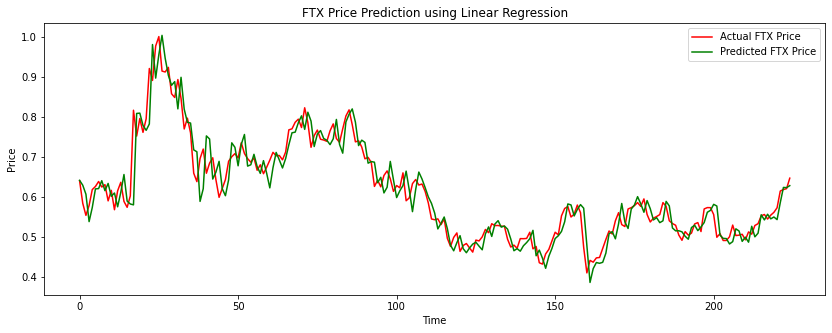

In [21]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual FTX Price')
plt.plot(test_predict, color = 'green', label = 'Predicted FTX Price')
plt.title('FTX Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()